<a href="https://colab.research.google.com/github/julesnotjools/thesis-filipino-pos-tagger/blob/master/t_SNE_Word_Embedding_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install -U -q PyDrive
import os
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# choose a local (colab) directory to store the data.
local_download_path = os.path.expanduser('~/data')
try:
  os.makedirs(local_download_path)
except: pass

# 2. Auto-iterate using the query syntax
#    https://developers.google.com/drive/v2/web/search-parameters
word2vecfolder = drive.ListFile(#check
    {'q': "'1bDMDOWGQh62HzFK68d-jHZu0Xn7ezKHl' in parents"}).GetList()
  
for f in word2vecfolder: #check this
  # 3. Create & download by id.
  print('title: %s, id: %s' % (f['title'], f['id']))
  fname = os.path.join(local_download_path, f['title'])
  print('downloading to {}'.format(fname))
  f_ = drive.CreateFile({'id': f['id']})
  f_.GetContentFile(fname)
  wordembeddings = fname
  print("Obtained:", f['title'])

     |████████████████████████████████| 993kB 36.0MB/s 
title: W2Vmodel300con8ep10.txt, id: 18F3cbDRFUU8diQuszziRvH8GEwuZl_Ya
downloading to /root/data/W2Vmodel300con8ep10.txt
Obtained: W2Vmodel300con8ep10.txt


## Import Dependencies

In [0]:
try:
    print('Importing dependencies...\n')
    import os
    import warnings
    warnings.filterwarnings(action='ignore', category=UserWarning, module='gensim')
    import gensim
    import pickle
    from gensim.models import KeyedVectors, Word2Vec
    import sklearn.manifold
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
    import time
except:
    print('Failed to import dependencies.')
else:
    print('Successfully imported dependencies.')

Importing dependencies...

Successfully imported dependencies.


## TSNE Visualization

In [0]:
model = KeyedVectors.load_word2vec_format(wordembeddings, binary=False)

In [0]:
print(len(model.vocab))

38125


In [0]:
model.similar_by_word("ay")

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('gubat', 0.2464444637298584),
 ('environment', 0.233698770403862),
 ('nakakapinsalang', 0.22968629002571106),
 ('Studio', 0.22867318987846375),
 ('Deep', 0.22450774908065796),
 ('Battle_of_Buxar', 0.22404780983924866),
 ('Mannikka', 0.22348502278327942),
 ('iikutin', 0.20429378747940063),
 ('magkaiba', 0.2041274905204773),
 ('humahamon', 0.20405416190624237)]

In [0]:
X = model[model.vocab]
print(len(X))

38125


In [0]:
tsne = sklearn.manifold.TSNE(n_components = 2, random_state = 0)
vector_matrix = model.vectors
print(vector_matrix)

[[-6.14687859e-04 -2.45139963e-04 -1.62945257e-03 ...  5.28210250e-04
  -3.04451591e-04 -1.59756129e-03]
 [ 6.82938935e-06 -1.38823001e-03  4.00004821e-04 ...  8.07992765e-04
  -1.11519929e-03 -5.73362515e-04]
 [ 3.16465012e-04 -1.10448815e-03  4.38538991e-04 ... -5.47694333e-04
   1.42167544e-03 -1.77974274e-04]
 ...
 [-1.36903851e-04  4.64794895e-04  4.76908928e-04 ... -1.18924072e-03
   1.19703356e-04 -4.82677249e-04]
 [-1.16669056e-04 -1.21952570e-03  1.46408493e-04 ...  1.57938164e-03
  -7.43047334e-04  7.07092637e-04]
 [ 3.25571658e-04  1.42081897e-03  1.52696494e-03 ...  2.94442889e-05
  -1.35180133e-03 -3.91258072e-04]]


In [0]:
print("Preparing t-SNE...")
start = time.time()
matrix_2d = tsne.fit_transform(vector_matrix)
end = time.time()
print('Preparation time:', end - start, 'seconds.')

Preparing t-SNE...
Preparation time: 2017.5586218833923 seconds.


In [0]:
points = pd.DataFrame(
    [
        (word, coords[0], coords[1])
        for word, coords in [
            (word, matrix_2d[model.vocab[word].index])
            for word in model.vocab
        ]
    ],
    columns=['word', 'x', 'y']
)

In [0]:
points.head(100)

,word,x,y
0,ng,-11.472423,-17.166077
1,na,8.424388,10.566455
2,",",14.875751,0.293308
3,sa,12.346217,-14.936569
4,ang,-1.687274,-19.443884
5,.,-6.873272,-3.399037
6,at,-3.427950,10.165141
7,ay,21.099892,5.508026
8,mga,-7.401767,9.156493
9,isang,-1.314159,15.931203


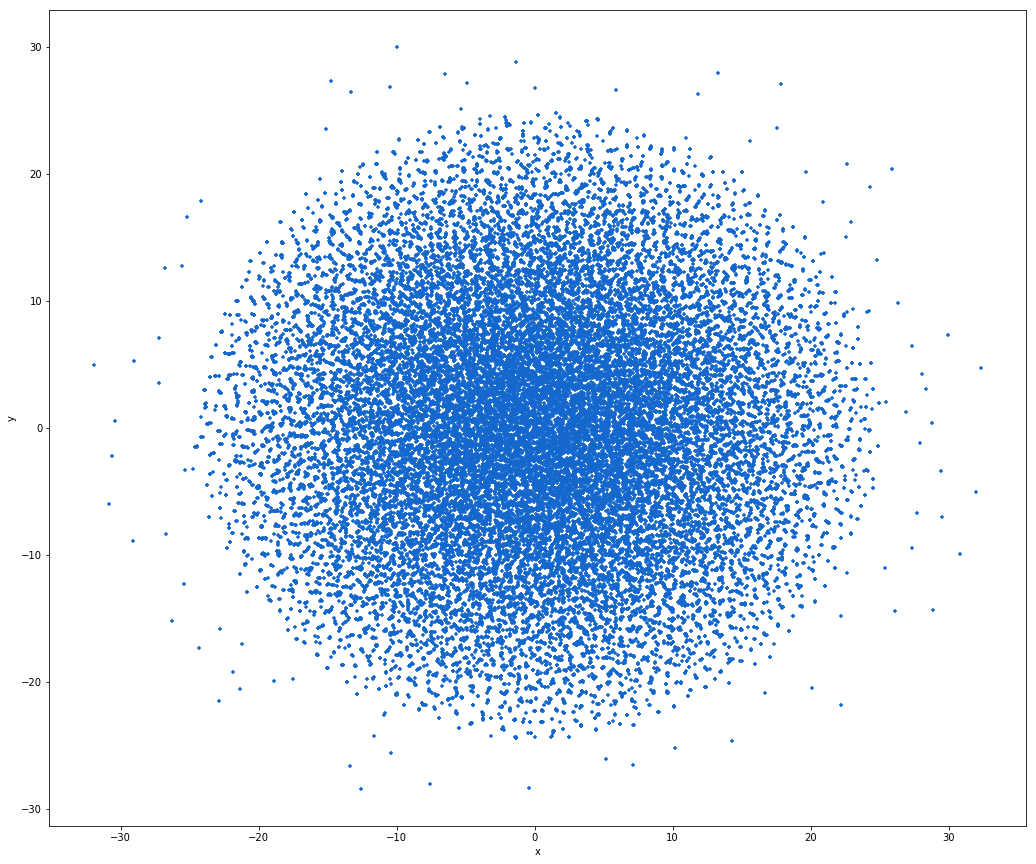

In [0]:
fig = points.plot.scatter('x','y', s=10, figsize=(17.5, 15), color="#1467CC", marker="+")

In [0]:
def plot_region(x_bounds, y_bounds):
    slice = points[
        (x_bounds[0] <= points.x) & (points.x <= x_bounds[1]) & (y_bounds[0] <= points.y) & (points.y <= y_bounds[1])
    ]
    
    ax = slice.plot.scatter("x", "y", s=35, figsize=(20, 20))
    for i, point in slice.iterrows():
        ax.text(point.x, point.y, point.word, fontsize=10)

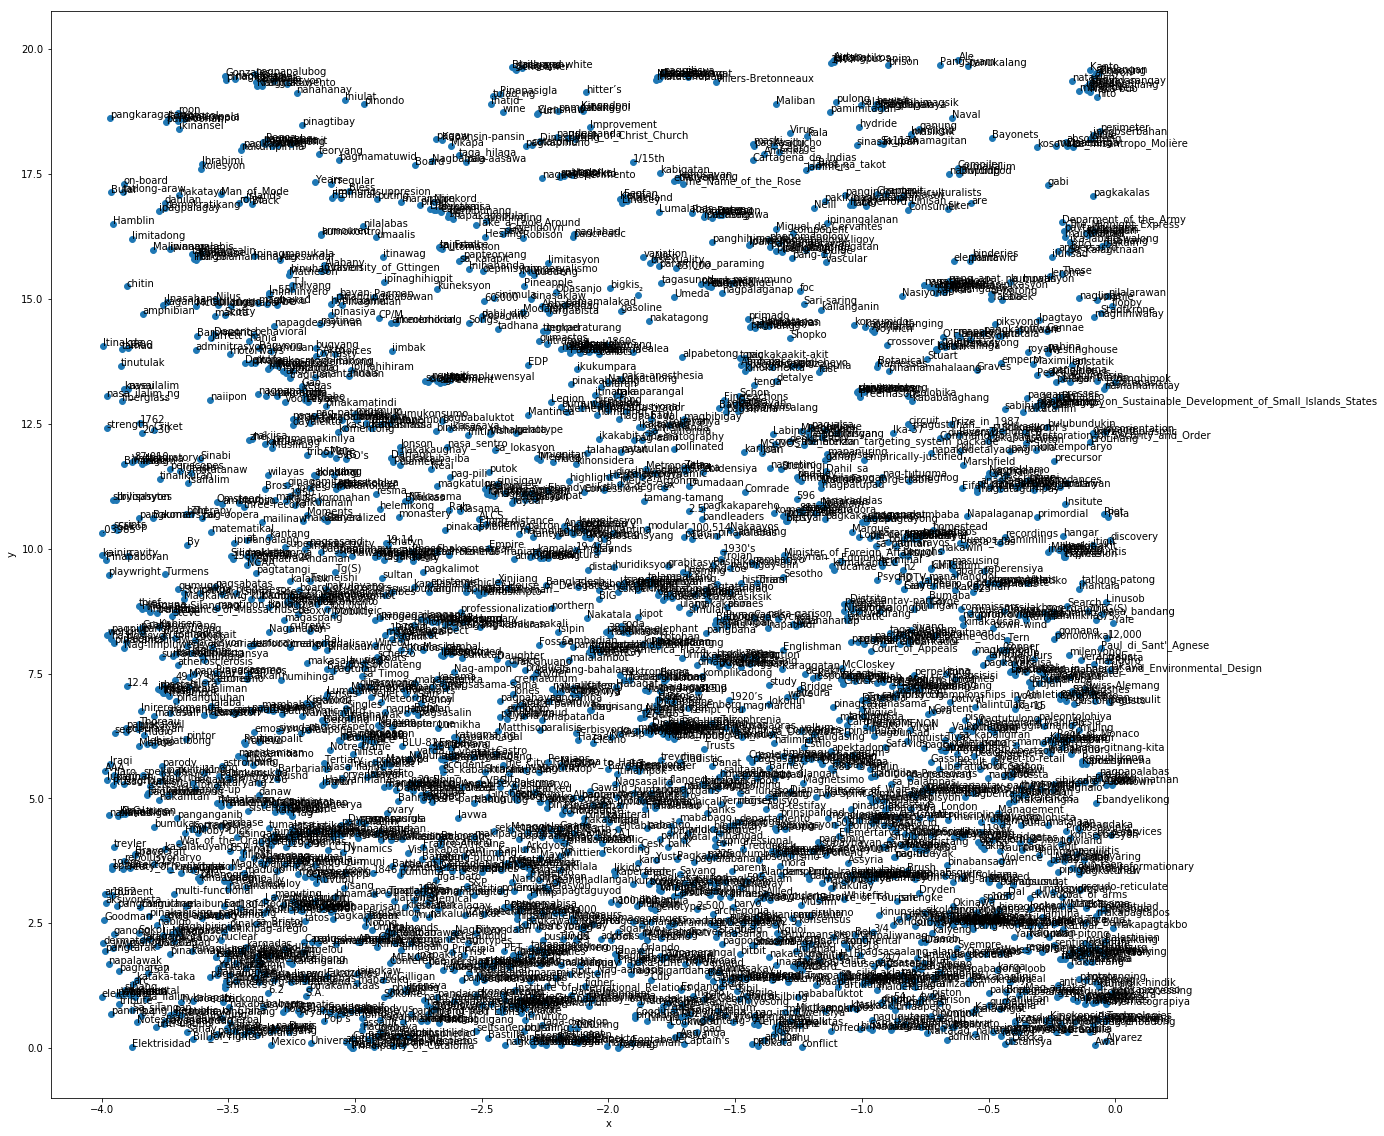

In [0]:
#Figure 1
plot_region(x_bounds=(-4.0, 0.0), y_bounds=(0, 20.0))

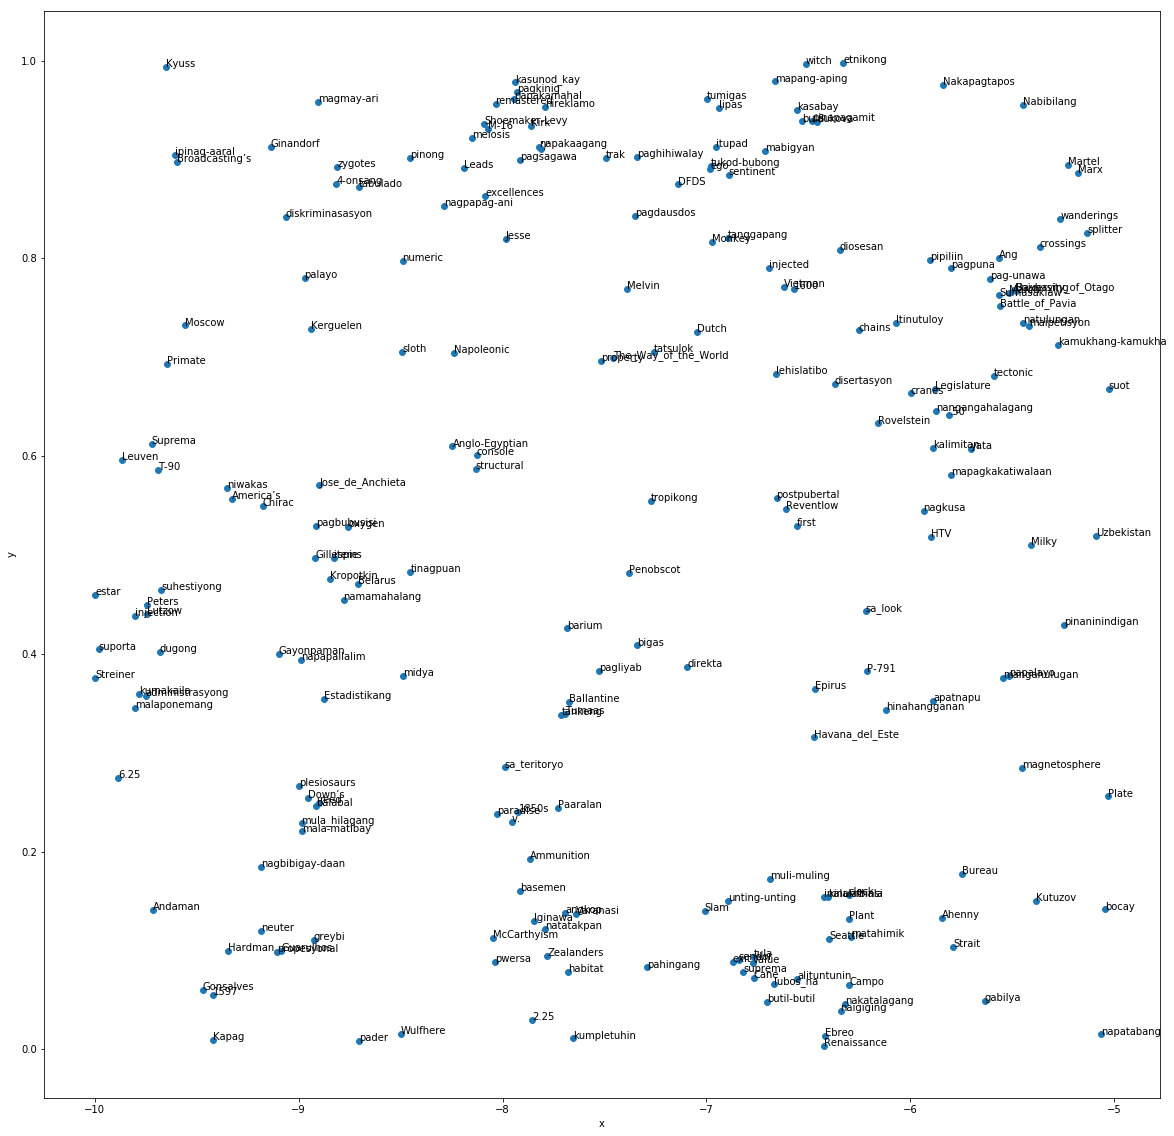

In [0]:
#Figure 2
plot_region(x_bounds=(-10.0, -5.0), y_bounds=(0, 1))

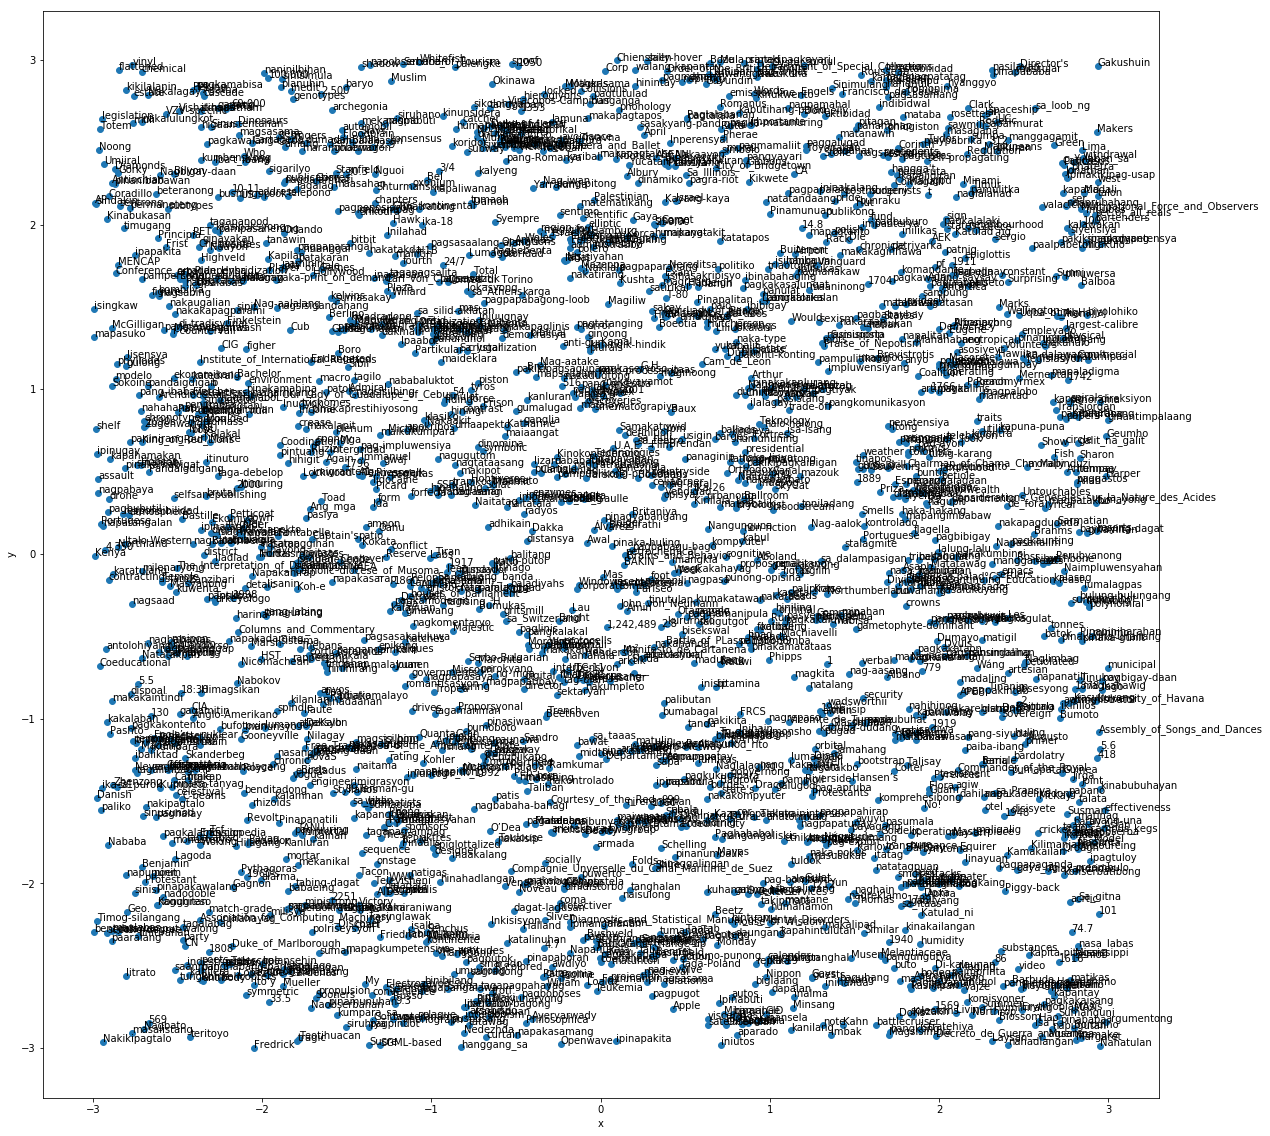

In [0]:
#Figure 3
plot_region(x_bounds=(-3.0, 3.0), y_bounds=(-3.0,3.0))

In [0]:
#Cosine Similarity

print(model.similarity('na', 'ng'))

-0.05184377


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [0]:
print(model.most_similar('pagbigay'))

[('virus', 0.24573466181755066), ('Karugtong', 0.23110614717006683), ('Bundok', 0.2260192334651947), ('diskriminatoryo', 0.22377903759479523), ('bolero', 0.2216702103614807), ('alaga', 0.2186775505542755), ('chronic', 0.21606242656707764), ('phenotype', 0.21519941091537476), ('Ipinapakita', 0.21446949243545532), ('Explorer', 0.21213872730731964)]


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [0]:
print(model.most_similar('kompetitor'))

[('Charleroi', 0.2370828539133072), ('nakaharang', 0.22661882638931274), ('Nevis', 0.22472518682479858), ('Rakosi', 0.22355395555496216), ('House_of_Commons', 0.21807213127613068), ('studio', 0.21659469604492188), ('conferences', 0.21468788385391235), ('pagmimintena', 0.2127075046300888), ('relation', 0.21205762028694153), ('kasiguraduhan', 0.20761433243751526)]


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [0]:
print('Most common tokens:\n', model.index2word[0], '\n', model.index2word[1], '\n', model.index2word[2])
vocab_size = len(model.vocab)
print('Least common tokens:\n', model.index2word[vocab_size - 1], '\n', model.index2word[vocab_size - 2], '\n', model.index2word[vocab_size - 3])

Most common tokens:
 ng 
 na 
 ,
Least common tokens:
 anti-oxidizing 
 949 
 nabalisa
